<a href="https://colab.research.google.com/github/anubhavgupta1/DeepLearning/blob/master/13_Deep_CNN_Torch_Vision_Models_Zoo_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Outline

1. Loading datasets - Transforming images
2. VGG-16 with modification to network head
3. Using pre-trained models
4. Storing intermediate models
5. Resnet
6. Inception v3

In [0]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

In [0]:
def find_parameters(x):
  total_parameters = 0
  for param in x:
    a = param.shape
    print(a)
    i = 0
    temp = 1
    while i < len(a):
      temp = temp * a[i]
      i = i + 1
    total_parameters = total_parameters + temp
  print("Total Parameters = ",total_parameters)

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [0]:
#Transfer Learning
# Using a model that is pre-trained on large comprehensive datasets and transferring that learning by modifying it slightly to perform the task at hand.

## Dataset, transforms, and visualisation

In [0]:
#Z-score normalization
#z_i = (x_i - x_mean)/x_std_deviation now z_i will lie between ( 0 and 1 ) 
#The main difference comes after normalizing the values as it reduces the skewness in our data, 
#it's just hypothetical that at mean=0.5 and std=0.5, CNNs tend to train better.

In [0]:
#sequence of operations in a pipeline

transform_train = transforms.Compose([
    transforms.RandomResizedCrop(224),  #CIFAR10 32 x 32 ==> 224 X 224 { VGG16, ResNet 224 x 224 }
    transforms.ToTensor(), #conversion into tensor 
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)), #Z-score normalization
    ])

transform_test = transforms.Compose([
    transforms.RandomResizedCrop(224), 
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

In [7]:
#download of CIFAR 10 IMAGES

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, 
                                        download=True, 
                                        transform=transform_train)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, 
                                        download=True, 
                                        transform=transform_test)


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [0]:
#CIFAR10 has 10 classes
num_classes = 10

In [0]:
batch_size = 4

In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

In [11]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)

print(images[1].shape)
print(labels[1].item())

torch.Size([4, 3, 224, 224])
torch.Size([3, 224, 224])
1


In [0]:
#How would you de-normalize an image after it undergoes transforms.Normalize((0.3, 0.3, 0.3), (0.4, 0.4, 0.4))
#npimg = img.numpy() / 2.5 + 0.3


In [0]:
def imshow(img, title):
    npimg = img.numpy() / 2 + 0.5 #un-normalize image pixels
    plt.figure(figsize=(batch_size, 1))
    plt.axis('off')
    plt.imshow(np.transpose(npimg, (1, 2, 0))) # 3, 224, 224 ===> 224, 224, 3
    plt.title(title)
    plt.show()

In [0]:
def show_batch_images(dataloader):
    images, labels = next(iter(dataloader))
    img = torchvision.utils.make_grid(images)
    imshow(img, title=[str(x.item()) for x in labels])

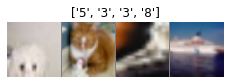

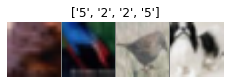

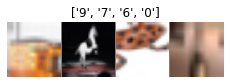

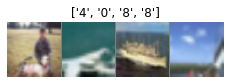

In [14]:
for i in range(4):
    show_batch_images(trainloader)

## Creating VGG-16

https://pytorch.org/docs/master/torchvision/models.html#torchvision-models

https://pytorch.org/docs/master/_modules/torchvision/models/vgg.html


In [0]:
from torchvision import models

In [0]:
vgg = models.vgg16_bn() # bn stands for batch normalisation

#Calculating Parameters

In [17]:
find_parameters(vgg.parameters())

torch.Size([64, 3, 3, 3])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64, 64, 3, 3])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([128, 64, 3, 3])
torch.Size([128])
torch.Size([128])
torch.Size([128])
torch.Size([128, 128, 3, 3])
torch.Size([128])
torch.Size([128])
torch.Size([128])
torch.Size([256, 128, 3, 3])
torch.Size([256])
torch.Size([256])
torch.Size([256])
torch.Size([256, 256, 3, 3])
torch.Size([256])
torch.Size([256])
torch.Size([256])
torch.Size([256, 256, 3, 3])
torch.Size([256])
torch.Size([256])
torch.Size([256])
torch.Size([512, 256, 3, 3])
torch.Size([512])
torch.Size([512])
torch.Size([512])
torch.Size([512, 512, 3, 3])
torch.Size([512])
torch.Size([512])
torch.Size([512])
torch.Size([512, 512, 3, 3])
torch.Size([512])
torch.Size([512])
torch.Size([512])
torch.Size([512, 512, 3, 3])
torch.Size([512])
torch.Size([512])
torch.Size([512])
torch.Size([512, 512, 3, 3])
torch.Size([512])
torch.Size([512])
torch.Size([512])
torch.Size([512,

#Details of VGG16



In [18]:
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

#Total Number of Features in VGG16

In [19]:
print(len(vgg.features))

44


#Checking Individual Features

In [20]:
print(vgg.features[0])

Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


#Classifier

In [21]:
#key part
print(vgg.classifier[6])

Linear(in_features=4096, out_features=1000, bias=True)


In [0]:
# output_featurs = 1000 because VggNet is trained on ImageNet but CIFAR10 out_feature = 10 is required. So we delete layer of 1000 neurons instead we placed layer of 10 neurons

In [0]:
#It is possible to change the number of output features of a layer in torchvision.model.vgg16 by 
#simply replacing that particular layer with a new nn.Linear() or nn.Conv2d() layer of our choice.

#Altering the number of classes

In [24]:
print(vgg.classifier)

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)


In [25]:
final_in_features = vgg.classifier[6].in_features
mod_classifier = list(vgg.classifier.children())[:-1]
mod_classifier


[Linear(in_features=25088, out_features=4096, bias=True),
 ReLU(inplace=True),
 Dropout(p=0.5, inplace=False),
 Linear(in_features=4096, out_features=4096, bias=True),
 ReLU(inplace=True),
 Dropout(p=0.5, inplace=False)]

In [26]:
mod_classifier.extend([nn.Linear(final_in_features, num_classes)])
i = 0
while i< len(mod_classifier):
  print(mod_classifier[i])
  i = i + 1

Linear(in_features=25088, out_features=4096, bias=True)
ReLU(inplace=True)
Dropout(p=0.5, inplace=False)
Linear(in_features=4096, out_features=4096, bias=True)
ReLU(inplace=True)
Dropout(p=0.5, inplace=False)
Linear(in_features=4096, out_features=10, bias=True)


In [27]:
# now we need to change vgg classifier features will be same only classifier will change 
vgg.classifier = nn.Sequential(*mod_classifier)
print(vgg.classifier)

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=10, bias=True)
)


#Train CIFAR10

In [0]:
batch_size = 16

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

In [0]:
def evaluation(dataloader, model):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [0]:
vgg = vgg.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(vgg.parameters(), lr=0.05)

In [32]:
n_iters = np.ceil(50000/batch_size) #ceiling function
n_iters

3125.0

Iteration: 0/3125, Loss: 1.73
Iteration: 100/3125, Loss: 1.78
Iteration: 200/3125, Loss: 1.65
Iteration: 300/3125, Loss: 1.64
Iteration: 400/3125, Loss: 1.97
Iteration: 500/3125, Loss: 1.50
Iteration: 600/3125, Loss: 1.70
Iteration: 700/3125, Loss: 2.22
Iteration: 800/3125, Loss: 2.14
Iteration: 900/3125, Loss: 1.76
Iteration: 1000/3125, Loss: 1.52
Iteration: 1100/3125, Loss: 1.51
Iteration: 1200/3125, Loss: 2.09
Iteration: 1300/3125, Loss: 1.83
Iteration: 1400/3125, Loss: 1.59
Iteration: 1500/3125, Loss: 1.67
Iteration: 1600/3125, Loss: 1.87
Iteration: 1700/3125, Loss: 1.55
Iteration: 1800/3125, Loss: 1.41
Iteration: 1900/3125, Loss: 1.71
Iteration: 2000/3125, Loss: 2.02
Iteration: 2100/3125, Loss: 1.41
Iteration: 2200/3125, Loss: 1.76
Iteration: 2300/3125, Loss: 1.29
Iteration: 2400/3125, Loss: 1.82
Iteration: 2500/3125, Loss: 1.64
Iteration: 2600/3125, Loss: 2.08
Iteration: 2700/3125, Loss: 1.44
Iteration: 2800/3125, Loss: 1.85
Iteration: 2900/3125, Loss: 1.45
Iteration: 3000/3125, 

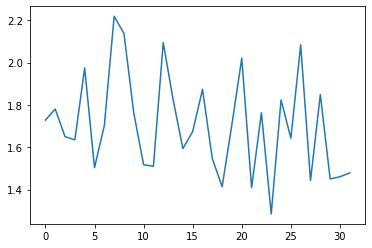

CPU times: user 14min 26s, sys: 9min 6s, total: 23min 32s
Wall time: 23min 38s


In [37]:
%%time
loss_epoch_arr = []
max_epoch = 1
for epoch in range(max_epoch):
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)

    opt.zero_grad()

    outputs = vgg(inputs)

    loss = loss_fn(outputs, labels)
    loss.backward()

    opt.step()

    del inputs, labels, outputs
    torch.cuda.empty_cache()

    if i % 100 == 0:
      print('Iteration: %d/%d, Loss: %0.2f' % (i, n_iters, loss.item()))
      loss_epoch_arr.append(loss.item())

  
  print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epoch,evaluation(testloader, vgg), evaluation(trainloader, vgg)))
   
    
plt.plot(loss_epoch_arr)
plt.show()


In [0]:
# loss(random) = 2.3 approx

In [0]:
# It is taking very long time to train. So we need to speed up.
# Adding momentum to optim.SGD()
# selecting a different optimizer like optim.ADAM()

### Freeze layers of Convolutional Operations

In [0]:
# Rather than doing things from  scratch, we can use pre - trained models which are already trained on some network and their most optimized wights have been saved.
# Then we can use those weights and can train only parts of our network.

In [0]:
#What benefits does transfer learning offer over training the entire model maually?
# The pre trained model is trained on very large volumes of data, which might be difficult to replicate during manual training with our own dataset. 
# The number of parameters to be trained is drastically reduced, as far we only train few layersto fine tune the output model.

In [0]:

batch_size = 16

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

In [41]:
vgg = models.vgg16_bn(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/checkpoints/vgg16_bn-6c64b313.pth


In [0]:
# if we do back propagation we don't need to update parameters ie weights or bias because they are already in their stage.
# these parameters are frozen parameters
for param in vgg.parameters():
    param.requires_grad = False

In [0]:
# we delete layer of 1000 neurons instead we placed layer of 10 neurons. So we need to train only these parameters out of 13 million parameters
final_in_features = vgg.classifier[6].in_features
vgg.classifier[6] = nn.Linear(final_in_features, num_classes)

In [45]:
find_parameters(vgg.parameters())

torch.Size([64, 3, 3, 3])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64, 64, 3, 3])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([128, 64, 3, 3])
torch.Size([128])
torch.Size([128])
torch.Size([128])
torch.Size([128, 128, 3, 3])
torch.Size([128])
torch.Size([128])
torch.Size([128])
torch.Size([256, 128, 3, 3])
torch.Size([256])
torch.Size([256])
torch.Size([256])
torch.Size([256, 256, 3, 3])
torch.Size([256])
torch.Size([256])
torch.Size([256])
torch.Size([256, 256, 3, 3])
torch.Size([256])
torch.Size([256])
torch.Size([256])
torch.Size([512, 256, 3, 3])
torch.Size([512])
torch.Size([512])
torch.Size([512])
torch.Size([512, 512, 3, 3])
torch.Size([512])
torch.Size([512])
torch.Size([512])
torch.Size([512, 512, 3, 3])
torch.Size([512])
torch.Size([512])
torch.Size([512])
torch.Size([512, 512, 3, 3])
torch.Size([512])
torch.Size([512])
torch.Size([512])
torch.Size([512, 512, 3, 3])
torch.Size([512])
torch.Size([512])
torch.Size([512])
torch.Size([512,

In [49]:
for param in vgg.parameters():
    if param.requires_grad:
        print(param.shape)

torch.Size([10, 4096])
torch.Size([10])


In [0]:
vgg = vgg.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(vgg.parameters(), lr=0.05)

Iteration: 0/3125, Loss: 2.30
Iteration: 100/3125, Loss: 1.67
Iteration: 200/3125, Loss: 2.03
Iteration: 300/3125, Loss: 1.75
Iteration: 400/3125, Loss: 1.54
Iteration: 500/3125, Loss: 1.47
Iteration: 600/3125, Loss: 1.77
Iteration: 700/3125, Loss: 2.05
Iteration: 800/3125, Loss: 2.37
Iteration: 900/3125, Loss: 2.16
Iteration: 1000/3125, Loss: 2.46
Iteration: 1100/3125, Loss: 2.74
Iteration: 1200/3125, Loss: 2.91
Iteration: 1300/3125, Loss: 2.14
Iteration: 1400/3125, Loss: 2.01
Iteration: 1500/3125, Loss: 1.82
Iteration: 1600/3125, Loss: 1.42
Iteration: 1700/3125, Loss: 2.08
Iteration: 1800/3125, Loss: 2.16
Iteration: 1900/3125, Loss: 2.33
Iteration: 2000/3125, Loss: 1.83
Iteration: 2100/3125, Loss: 1.97
Iteration: 2200/3125, Loss: 1.34
Iteration: 2300/3125, Loss: 2.25
Iteration: 2400/3125, Loss: 2.84
Iteration: 2500/3125, Loss: 2.32
Iteration: 2600/3125, Loss: 2.14
Iteration: 2700/3125, Loss: 2.35
Iteration: 2800/3125, Loss: 2.37
Iteration: 2900/3125, Loss: 1.74
Iteration: 3000/3125, 

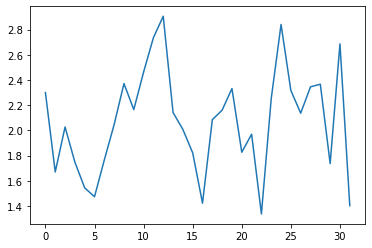

CPU times: user 8min 23s, sys: 4min 28s, total: 12min 52s
Wall time: 12min 53s


In [51]:
%%time
loss_epoch_arr = []
max_epoch = 1



n_iters = np.ceil(50000/batch_size)

for epoch in range(max_epoch):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = vgg(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        if i % 100 == 0:
            print('Iteration: %d/%d, Loss: %0.2f' % (i, n_iters, loss.item()))
            loss_epoch_arr.append(loss.item())
            
        del inputs, labels, outputs
        torch.cuda.empty_cache()
    
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (
        epoch, max_epoch, 
        evaluation(testloader, vgg), evaluation(trainloader, vgg)))
    
    
plt.plot(loss_epoch_arr)
plt.show()

In [0]:
# instability of loss; we should stable loss; Checkpinting

### With model copies

In [0]:
# Checkpointing
# store all the parameters of the network when we achieve signigicance improvement in loss 

In [0]:
import copy
# it allows us to make copies of the structures in python

In [54]:
loss_epoch_arr = []
max_epochs = 1

min_loss = 1000

n_iters = np.ceil(50000/batch_size)

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = vgg(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        if min_loss > loss.item():
            min_loss = loss.item()
            best_model = copy.deepcopy(vgg.state_dict())#vgg.state_dict() gives access to entire parameter state.
            print('Min loss %0.2f' % min_loss)
        
        if i % 100 == 0:
            print('Iteration: %d/%d, Loss: %0.2f' % (i, n_iters, loss.item()))
            
        del inputs, labels, outputs
        torch.cuda.empty_cache()
        
    loss_epoch_arr.append(loss.item())

Min loss 3.77
Iteration: 0/3125, Loss: 3.77
Min loss 1.90
Min loss 1.74
Min loss 1.36
Min loss 1.32
Min loss 1.09
Iteration: 100/3125, Loss: 2.61
Min loss 0.86
Iteration: 200/3125, Loss: 1.59
Min loss 0.73
Iteration: 300/3125, Loss: 1.98
Min loss 0.73
Iteration: 400/3125, Loss: 1.54
Min loss 0.47
Iteration: 500/3125, Loss: 2.79
Iteration: 600/3125, Loss: 2.48
Iteration: 700/3125, Loss: 1.57
Iteration: 800/3125, Loss: 1.84
Iteration: 900/3125, Loss: 3.84
Iteration: 1000/3125, Loss: 2.82
Iteration: 1100/3125, Loss: 1.26
Iteration: 1200/3125, Loss: 2.02
Iteration: 1300/3125, Loss: 2.33
Iteration: 1400/3125, Loss: 1.08
Iteration: 1500/3125, Loss: 3.60
Iteration: 1600/3125, Loss: 1.88
Iteration: 1700/3125, Loss: 1.20
Iteration: 1800/3125, Loss: 1.71
Iteration: 1900/3125, Loss: 1.85
Iteration: 2000/3125, Loss: 1.77
Iteration: 2100/3125, Loss: 1.38
Iteration: 2200/3125, Loss: 1.50
Iteration: 2300/3125, Loss: 1.43
Iteration: 2400/3125, Loss: 1.75
Iteration: 2500/3125, Loss: 2.64
Iteration: 260

In [55]:
vgg.load_state_dict(best_model)
print(evaluation(trainloader, vgg), evaluation(testloader, vgg))

44.1 44.12
